In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

import torch

!ls "/content/drive/My Drive/Colab_Notebooks/data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
agnostic_bert_article_embeddings.pkl   datacluster_1_with_embeddings.pkl
agnostic_bert_first100_embeddings.pkl  datacluster_2_with_embeddings.pkl
agnostic_bert_title_embeddings10k.pkl  datacluster_3_with_embeddings.pkl
agnostic_bert_title_embeddings.pkl     datacluster_4_with_embeddings.pkl
all-the-news-2-1.csv		       dbscan_Agnostic_clusters_analysis.csv
bert_article_embeddings10K.pkl	       full_clusterd.pkl
bert_article_embeddings.pkl	       full_clustered.pkl
bert_first100_embeddings.pkl	       full_data_fixed_dates.pkl
bert_title_embeddings10K.pkl	       full_dataset_Fine_embeddings.pkl
cleaned_100k.csv		       full_dataset_with_embeddings.pkl
cleaned_10k.csv			       full_data_with_dbscan.pkl
cleaned_10k_with_first100.csv	       full_data_with_dbscan_revised.pkl
cleaned_15k.csv			       full_data_with_finetuned_embeddings.pkl
cleaned_30k.csv			       f

In [ ]:
# טעינת הנתונים
df = pd.read_pickle('/content/drive/My Drive/Colab_Notebooks/data/full_data_with_finetuned_embeddings.pkl')



Cosine Distance  titles check fine tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances


# טווחי המרחקים לבדיקה
distance_ranges = [
    (0.03, 0.05),
    (0.05, 0.08),
    (0.08, 0.11),
]

# מעבר על כל קלאסטר ראשי
for cluster_num in df['ag_title_cluster'].unique():
    print(f"\n🔍 Analyzing Cosine Similarity for Main Cluster {cluster_num}")

    # סינון הנתונים של הקלאסטר
    cluster_df = df[df['ag_title_cluster'] == cluster_num]

    if len(cluster_df) < 2:
        print(f"⚠️ Cluster {cluster_num} has less than 2 articles, skipping.")
        continue

    # טעינת ה-embeddings המנורמלים
    embeddings = np.stack(cluster_df['normalized_titles_finetuned_embedding'].values)

    # חישוב מטריצת Cosine Distance
    distance_matrix = cosine_distances(embeddings)

    # מילון לאחסון זוגות דומים מכל טווח מרחקים
    selected_pairs = {str(b): [] for b in distance_ranges}

    # מעבר על כל זוג כתבות
    num_articles = len(cluster_df)
    for i in range(num_articles):
        for j in range(i + 1, num_articles):  # מונעים כפילות
            cos_distance = distance_matrix[i, j]

            # בדיקה אם המרחק נכנס לטווחים שנבחרו
            for b in distance_ranges:
                if b[0] <= cos_distance < b[1]:
                    if len(selected_pairs[str(b)]) < 5:  # ניקח 2 דוגמאות בלבד מכל טווח
                        selected_pairs[str(b)].append((i, j, cos_distance))
                    break  # יציאה מהלולאה אחרי מציאת טווח מתאים

    # **הדפסת דוגמאות שנבחרו מכל טווח מרחקים**
    for b, pairs in selected_pairs.items():
        print(f"\n📌 Distance Range: {b} - Showing 2 Examples")
        for i, j, cos_dist in pairs:
            title1 = cluster_df.iloc[i]['title'][:100]
            article1 = cluster_df.iloc[i]['F100'][:200] + "..."
            title2 = cluster_df.iloc[j]['title'][:100]
            article2 = cluster_df.iloc[j]['F100'][:200] + "..."
            print(f"\n🔹 Cosine Distance: {cos_dist:.4f}")
            print(f"📄 title 1: {title1}")
            print(f"📄 Article 1: {article1}")
            print(f"📄 title 2: {title2}")
            print(f"📄 Article 2: {article2}")

IndentationError: unexpected indent (<ipython-input-4-aa9d3def4fd4>, line 14)

100 couples sample 0.04-0.05 with Bert

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances


# טווחי המרחקים לבדיקה
distance_ranges = [
    (0.02, 0.04)

]

# מעבר על כל קלאסטר ראשי
for cluster_num in df['ag_title_cluster'].unique():
    print(f"\n🔍 Analyzing Cosine Similarity for Main Cluster {cluster_num}")

    # סינון הנתונים של הקלאסטר
    cluster_df = df[df['ag_title_cluster'] == cluster_num]

    if len(cluster_df) < 2:
        print(f"⚠️ Cluster {cluster_num} has less than 2 articles, skipping.")
        continue

    # טעינת ה-embeddings המנורמלים
    embeddings = np.stack(cluster_df['Normalized_title_bert_embeddings'].values)

    # חישוב מטריצת Cosine Distance
    distance_matrix = cosine_distances(embeddings)

    # מילון לאחסון זוגות דומים מכל טווח מרחקים
    selected_pairs = {str(b): [] for b in distance_ranges}

    # מעבר על כל זוג כתבות
    num_articles = len(cluster_df)
    for i in range(num_articles):
        for j in range(i + 1, num_articles):  # מונעים כפילות
            cos_distance = distance_matrix[i, j]

            # בדיקה אם המרחק נכנס לטווחים שנבחרו
            for b in distance_ranges:
                if b[0] <= cos_distance < b[1]:
                    if len(selected_pairs[str(b)]) < 15:  # ניקח 2 דוגמאות בלבד מכל טווח
                        selected_pairs[str(b)].append((i, j, cos_distance))
                    break  # יציאה מהלולאה אחרי מציאת טווח מתאים

    # **הדפסת דוגמאות שנבחרו מכל טווח מרחקים**
    for b, pairs in selected_pairs.items():
        print(f"\n📌 Distance Range: {b} - Showing 2 Examples")
        for i, j, cos_dist in pairs:
            title1 = cluster_df.iloc[i]['title'][:100]
            article1 = cluster_df.iloc[i]['F100'][:200] + "..."
            title2 = cluster_df.iloc[j]['title'][:100]
            article2 = cluster_df.iloc[j]['F100'][:200] + "..."
            print(f"\n🔹 Cosine Distance: {cos_dist:.4f}")
            print(f"📄 title 1: {title1}")
            print(f"📄 Article 1: {article1}")
            print(f"📄 title 2: {title2}")
            print(f"📄 Article 2: {article2}")


🔍 Analyzing Cosine Similarity for Main Cluster 0

📌 Distance Range: (0.02, 0.04) - Showing 2 Examples

🔹 Cosine Distance: 0.0381
📄 title 1: Why Have a Baby When You Can Have Baby Yoda Instead?
📄 Article 1: California is burning, Delhi is shrouded in smog, and Venice is sinking into the seas. Climate change is real, politicians are doing nothing to stop it, and Sky Ferreira still hasn’t released that sop...
📄 title 2: Why Stress When You Can See a Wedding Therapist?
📄 Article 2: FIELD NOTES Happiest time of your life? Ha! Planning a wedding can be a tricky time as deep-rooted family problems often arise during the process. Parts of Shira Notrika’s wedding planning were fun. A...

🔹 Cosine Distance: 0.0381
📄 title 1: Why Are People Asking Laura Dern About Baby Yoda?
📄 Article 1: On Monday night, a bunch of miscellaneous celebrities came together to watch Marriage Story win a lot of awards at IFP's annual Gotham Awards in New York City. One of these celebrities was Marriage St...
📄 title

# timing reserch

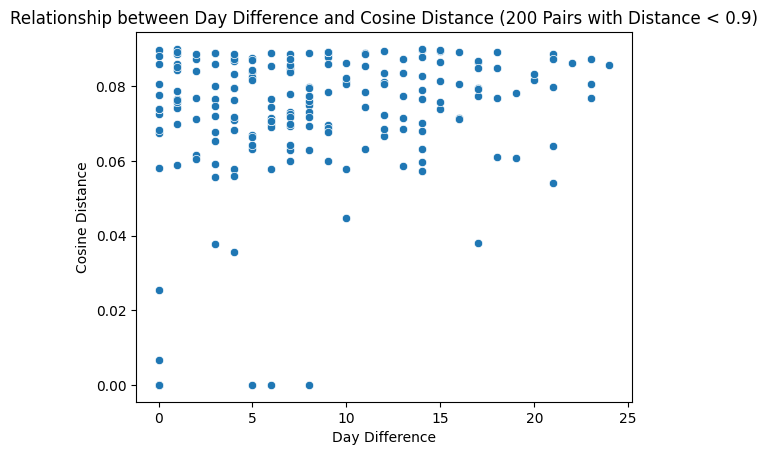

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

embeddings = np.stack(df['normalized_titles_finetuned_embedding'].values)
distances = cosine_distances(embeddings)

# יצירת רשימה של אינדקסים של זוגות שהמרחק ביניהם נמוך מ-0.9
pairs = []
for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        if distances[i, j] < 0.09:
            pairs.append((i, j))

# בחירת 200 זוגות באופן אקראי
import random
selected_pairs = random.sample(pairs, 200)

day_diffs = []
for i, j in selected_pairs:
    day_diff = abs((df.loc[i, 'date'] - df.loc[j, 'date']).days)
    day_diffs.append(day_diff)

cosine_distances = []
for i, j in selected_pairs:
    cosine_distances.append(distances[i, j])


import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=day_diffs, y=cosine_distances)
plt.xlabel('Day Difference')
plt.ylabel('Cosine Distance')
plt.title('Relationship between Day Difference and Cosine Distance (200 Pairs with Distance < 0.9)')
plt.show()